# Assignment 4

In this assignment, you will design a domain model based on an existing text, and fully implement it using the L2-Python software. You can use the model template as an example of this process. The basis for the model is formed by the text provided in the next section, about the topic of loneliness. In order to convert this description into a working simulation model, you should take the steps described in this Notebook as well as the template.

### Literature about loneliness

Loneliness is a universal human emotion, of which the form and intensity vary strongly across individuals and over time. According to recent literature[1], the central element in the development of loneliness is the *feeling of loneliness*. Cacioppo and Patrick (2008) identified three main factors that play a role in determining how lonely people feel. First, your *basic level of vulnerability* to social disconnection determines how strongly you need social connections. This level is genetically determined, hence it is difficult to change. Second, your *emotion regulation ability* has a diminishing effect on your feeling of loneliness. For example, people who are more skilled at applying emotion regulation strategies (like ‘focusing on positive things’) will feel less lonely than people who do not possess these skills. The ability to regulate your emotions can be improved by regular *training*. Third, your *expectations about others* influence the experience of loneliness in the sense that people who constantly interpret their friends’ behaviour as rejecting are more likely to feel lonely. Learning to change your expectations about others can also be achieved using *training*. In addition to these three factors, a (more trivial) fourth factor is the *amount of social activities* people enjoy. Finally, the feeling of loneliness may have a number of negative effects, both behaviourally and a physically level. These effects include, among others, *alcoholism*, and a higher *chance on cardiovascular diseases*.

[1] References:

* Cacioppo, John T. and Patrick, William (2008). Loneliness: Human Nature and The Need for Social Connection. New York: W.W. Norton and Company.
* http://blogs.psychcentral.com/emotionally-sensitive/2012/03/loneliness/
* https://www.verywell.com/loneliness-causes-effects-and-treatments-2795749

## 1. The concepts (20 points)

Create a table in which you list all relevant concepts that you will use in your model. The categories include three aspects: for each concept, first name the concept (e.g., ‘age’), then give a formalisation of the concept (e.g., ‘has_age(A:AGENT, X:REAL)’), and finally provide an informal explanation (e.g., ‘agent A is X years old’). 

***
Table goes here!

Concept Name |Formalization |Explanation
---- |-----|----
Vulnerability  |  'has_vulnerability(A:AGENT, X:REAL)'  |  'agent A has X level of vulnerability, genetically'  
Emotion regulation ability  |  'has_emotion_ability(A:AGENT, X:REAL)'  |  'agent A has X level of ability of regulating his/hers emotions' 
Expectations about others   |   'has_expectation(A:AGENT, A:AGENT, X:REAL)' |   'agent A has X level of positive expectations towards other people in society, based on if training is True or False'
Training    |   'has_training(A:AGENT, B:BOOLEAN)' |   'agent A either learns/trains towards not feeling lonely or doesn't'
Attendance to social activities |   'has_social_activities(A:AGENT, X:REAL)' |   'agent A either attends the social activities or doesn't'
Loneliness      |   'has_loneliness(A:AGENT, X:REAL)'   |   'agent A has X "amount"/level of loneliness in the current state, range 0-200, the higher the level of loneliness - the worse feeling of loneliness'
Work Performance        |   'has_work_performance(A:AGENT, B:BOOLEAN)'  |   'agent A has bad work performance or doesn't, based on the level of loneliness'
Alcoholism      |   'has_alcoholism(A:AGENT, B:BOOLEAN)'  |   'agent A has alcoholism or doesn't, based on the level of loneliness'
Chance of Cardiovascular diseases       |   'has_disease(A:AGENT, B: BOOLEAN)'  |   'agent A has chance for cardiovascular disease or doesn't, based on the level of loneliness
***

## 2. Graphical Representation (20 points)

Create a graphical representation of the relations between all concepts. This should have the form of a picture in which each concept is represented as a circle and each relation between two concepts as an arrow between the circles.

***
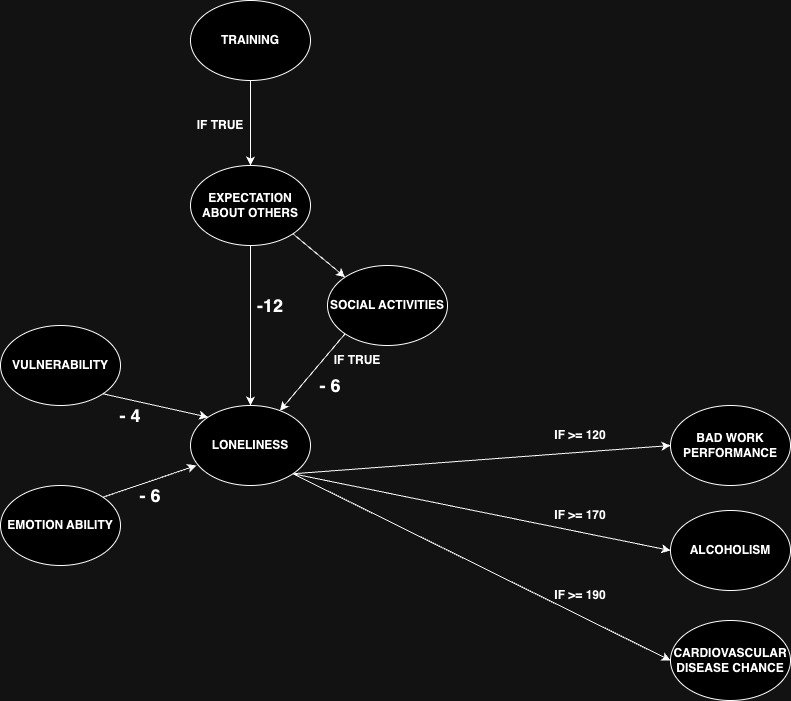
***

## 3. Semi-formal Rules (20 points)

Write a set of semi-formal rules that specify the relations between the concepts in more detail. This time, make sure that you include details of the relations, such as conjunctions and negations, or possibly numerical relations. A simple example of such a rule would be: ‘AT EACH TIME STEP, IF agent A has age X AND it is agent A’s birthday THEN AT NEXT TIME STEP agent A will have age X+1’.

***
* 1

    AT TIME STEP 20, the training of agent A starts, thus has_training turns to True (by the task description)
    

* 2

    AT TIME STEP 30, the agent A starts to enjoy social activities, thus has_social_activities turns to True (by the task description)


* 3

    AT EACH TIME STEP, IF agent A has no training (has_training is False), THEN "Loneliness" = "Vulnerability" + "Emotion regulation ability"


* 4

    AT EACH TIME STEP, IF agent A has training (has_training is True) BUT doesn't enjoy social activities (has_social_activities = False), THEN "Loneliness" = "Vulnerability" + "Emotion regulation ability" + "Expectation about others"


* 5

    AT EACH TIME STEP, IF agent A has training (has_training is True) AND enjoys social activities (has_social_activities = True), THEN "Loneliness" = "Vulnerability" + "Emotion regulation ability" + "Expectation about others" - 8


* 6

    AT EACH TIME STEP, IF agent A's level of loneliness exceeds the "Bad work performance" threshold (>= 120 units of loneliness), THEN agent A starts to have bad performace in work (has_bad_work_performance turns True). AT EACH TIME STEP, IF agent's A level loneliness goes below the "Bad work performance" threshold (< 120 units of loneliness), THEN agent A stops having bad performance in work (has_bad_work_performance turns False).


* 7

    AT EACH TIME STEP, IF agent A's level of loneliness exceeds the "Alcoholism" threshold (>= 170 units of loneliness), THEN agent A starts to become alcoholic (has_alcoholism turns True). AT EACH TIME STEP, IF agent's A level loneliness goes below the "Alcoholism" threshold (< 170 units of loneliness), THEN agent A stops being alcoholic (has_alcoholism turns False).

*Note: This is quite an extreme example, as in the model the person would have alcoholism disease for about 7 time steps; however, The presence of alcoholism is just made for the purpose of the model, doesn't need to be fully realistic.*


* 8

    AT EACH TIME STEP, IF agent A's level of loneliness exceeds the "Chance of Cardiovascular disease" threshold (>= 190 units of loneliness), THEN agent A starts having a high chance of Cardiovascular disease (has_disease turns True). AT EACH TIME STEP, IF agent's A level loneliness goes below the "Chance of Cardiovascular disease" threshold (< 190 units of loneliness), THEN agent A stops having the chance of Cardiovascular disease (has_disease turns False).

***

## 4. Implementation (40 points)

Implement part of the domain model specified above using the L2-Python software and make sure that it runs correctly. In particular, you are asked to define the sorts, predicates, scenario, and one rule (e.g. how the value of loneliness influences one of the effects of loneliness). Make sure your implementation of the model is consistent with <b> all </b> the conceptual description you created in the previous steps.

#### Imports
Before we write the rules, we first import the Predicate class, just as we did in assignment 3.

In [1]:
from l2 import StateMachine, Predicate, INF
state_machine = StateMachine()
state_machine.max_t = 50

# In addition, we import inspect, for debug purposes
import inspect

#### Sorts
First, define the sorts file. Make sure you define the sorts in the same manner you did in assignment 3.

In [2]:
state_machine.sorts = {
    'AGENT': ['agent_mikolaj'],
    'BOOLEAN': ['True', 'False'],
    'REAL': []
}

The StateMachine contains the following defined sorts, besides BOOLEAN and REAL: 
+-----------+---------------+
| Sort name |  Sort values  |
+-----------+---------------+
|   AGENT   | agent_mikolaj |
|  BOOLEAN  |  True, False  |
|    REAL   |               |
+-----------+---------------+


#### Predicates
Next, define the predicates file. Make sure you define the predicates in the same manner you did in assignment 3.

In [3]:
state_machine.predicates = {
    'has_loneliness': ['AGENT', 'REAL'],
    'has_vulnerability': ['AGENT', 'REAL'],
    'has_emotion_ability': ['AGENT', 'REAL'],
    'has_expectation': ['AGENT', 'REAL'],
    'has_training': ['AGENT', 'BOOLEAN'],
    'has_social_activities': ['AGENT', 'BOOLEAN'],
    'has_negative': ['AGENT', 'REAL'],
    'has_alcoholism': ['AGENT', 'BOOLEAN'],
    'has_bad_work_performance': ['AGENT', 'BOOLEAN'],
    'has_disease': ['AGENT', 'BOOLEAN']
}


The StateMachine contains the following predicates with their corresponding sorts: 
+--------------------------+----------------------+
|      Predicate name      |        Sorts         |
+--------------------------+----------------------+
|      has_loneliness      |  ['AGENT', 'REAL']   |
|    has_vulnerability     |  ['AGENT', 'REAL']   |
|   has_emotion_ability    |  ['AGENT', 'REAL']   |
|     has_expectation      |  ['AGENT', 'REAL']   |
|       has_training       | ['AGENT', 'BOOLEAN'] |
|  has_social_activities   | ['AGENT', 'BOOLEAN'] |
|       has_negative       |  ['AGENT', 'REAL']   |
|      has_alcoholism      | ['AGENT', 'BOOLEAN'] |
| has_bad_work_performance | ['AGENT', 'BOOLEAN'] |
|       has_disease        | ['AGENT', 'BOOLEAN'] |
+--------------------------+----------------------+


#### Scenario
Thirdly, define the scenarios file. Make sure you define the scenarios(s) in the same manner you did in assignment 3. The idea is that after time point 20, a training will start, and from time point 30 the person will enjoy social activities.

In [4]:
state_machine.scenario = [
    ('has_vulnerability', ['agent_mikolaj', 4], [1, 50]),
    ('has_emotion_ability', ['agent_mikolaj', 6], [1, 50]),
    ('has_expectation', ['agent_mikolaj', -12], [1, 50]),
    ('has_training', ['agent_mikolaj', False], [1, 19]),
    ('has_training', ['agent_mikolaj', True], [20, INF]),
    ('has_social_activities', ['agent_mikolaj', False], [1, 29]),
    ('has_social_activities', ['agent_mikolaj', True], [30, INF])
]

#### Rules
From here, you should implement a number of rules. Remember that you have to create a rule for each concept with an incoming arrow. Adapt the rules and replace the placeholder names with the names of your concepts and predicates.

In [5]:
def rule1(states, t):
    """
    Rule 1: Calculating the loneliness and updating the 'has_loneliness' Predicate.

    Firstly, we need to retrieve into variables within the function, all values of Predicates that are relevant for the calculation of current loneliness, i.e. vulnerability, emotion_ability, expectation.
    Secondly, we need to retrieve 2 variables that we base the if statements and 2 different calculations of loneliness on, i.e. has_social_activities and has_training

    Lastly, there are checks for the presence of training and social_activities with if statements, and based on them we have 3 different calculations of the loneliness, after each we follow with adding the result to the 'has_loneliness' Predicate
    """
    previous_state = states[t - 1]
    
    vulnerability = previous_state.get_predicate_by_agent('has_vulnerability', 'agent_mikolaj')[0].value
    emotion_ability = previous_state.get_predicate_by_agent('has_emotion_ability', 'agent_mikolaj')[0].value
    expectation = previous_state.get_predicate_by_agent('has_expectation', 'agent_mikolaj')[0].value
    
    has_social_activities = previous_state.get_predicate_by_agent('has_social_activities', 'agent_mikolaj')[0].value
    has_training = previous_state.get_predicate_by_agent('has_training', 'agent_mikolaj')[0].value
    
    
    if has_training == False:
        loneliness = (vulnerability + emotion_ability) * int(t - 1) # the calculation of the loneliness when social_activities are not present, and the training is not present
        states[t].add_predicate_to_state(Predicate('has_loneliness', ['agent_mikolaj'], loneliness))

    elif has_training == True: #we already know from the scenario that 'has_training' Predicate turns True at the 20th timestep of the state, therefore at this timestep we can already retrieve the 'has_loneliness' Predicate because it is for sure present at this timestep
        
        for _, has_loneliness in previous_state.get_predicate_by_agent('has_loneliness', 'agent_mikolaj', 0): #first variable of the for loop is skipped, as we prefer to write the name of the agent ('agent_mikolaj' in this case), in all cases, for the clarity of Predicates, and it was only needed twice. Maybe if there was more Predicates to add, or agent to consider, then we would use the first variable from the above for loop
            if has_social_activities == True: #if the 'has_social_activities' Predicate has the value of True, then we calculate the loneliness differently (as described in the semi-formal rules and shown on the graphical model), hence we need to check with if statement here
                loneliness = has_loneliness + vulnerability + emotion_ability + expectation - 6 # the calculation of the loneliness when social_activities are present, but there is the training present; - 6 is there because that what enjpoying the social activities would give, additional positive effect on the level of loneliness
                states[t].add_predicate_to_state(Predicate('has_loneliness', ['agent_mikolaj'], loneliness))
            else: 
                loneliness = has_loneliness + vulnerability + emotion_ability + expectation # the calculation of the loneliness when social_activities are not present, but there is the training present
                states[t].add_predicate_to_state(Predicate('has_loneliness', ['agent_mikolaj'], loneliness))
        

    
    



In [6]:
def rule2(states, t):
    """
    Rule 2: Monitoring the level of the loneliness. If the level passes a certain threshold, then one of the negative effects is beginning to be present (turn to True), as described in Semi-formal rules, and shown on the graphical model

            threshold for Bad work performance -> loneliness >= 120

            threshold for Alcoholism -> loneliness >= 170

            threshold for Cardiovascular disease -> loneliness >= 190


        Once the loneliness goes below the threshold level, the negative effect should dissappear (turn to False)
    """
    previous_state = states[t - 1]

    if t >= 2: #we are starting to look at any variables below, only when 'has_loneliness' Predicate is present, i.e. from timepoint of the state = 1, therefore [t-1] = 1 if t = 2
        loneliness = previous_state.get_predicate_by_agent('has_loneliness', 'agent_mikolaj')[0].value
    
        if loneliness >= 120:
            states[t].add_predicate_to_state(Predicate('has_bad_work_performance', ['agent_mikolaj'], True))
        else:
            states[t].add_predicate_to_state(Predicate('has_bad_work_performance', ['agent_mikolaj'], False))

        if loneliness >= 170:
            states[t].add_predicate_to_state(Predicate('has_alcoholism', ['agent_mikolaj'], True))
        else:
            states[t].add_predicate_to_state(Predicate('has_alcoholism', ['agent_mikolaj'], False))
            

        if loneliness >= 190:
            states[t].add_predicate_to_state(Predicate('has_disease', ['agent_mikolaj'], True))
        else:
            states[t].add_predicate_to_state(Predicate('has_disease', ['agent_mikolaj'], False))
        
    
    


Add all the temporal rules (not the helper functions) to the rule set below.

In [7]:
rules = [rule1, rule2]

#### Run

Run the simulation!

The StateMachine runs in Debug mode!

The StateMachine contains the following defined sorts, besides BOOLEAN and REAL: 
+-----------+---------------+
| Sort name |  Sort values  |
+-----------+---------------+
|   AGENT   | agent_mikolaj |
|  BOOLEAN  |  True, False  |
|    REAL   |               |
+-----------+---------------+

The StateMachine contains the following predicates with their corresponding sorts: 
+--------------------------+----------------------+
|      Predicate name      |        Sorts         |
+--------------------------+----------------------+
|      has_loneliness      |  ['AGENT', 'REAL']   |
|    has_vulnerability     |  ['AGENT', 'REAL']   |
|   has_emotion_ability    |  ['AGENT', 'REAL']   |
|     has_expectation      |  ['AGENT', 'REAL']   |
|       has_training       | ['AGENT', 'BOOLEAN'] |
|  has_social_activities   | ['AGENT', 'BOOLEAN'] |
|       has_negative       |  ['AGENT', 'REAL']   |
|      has_alcoholism      | ['AGENT', 'BOOLEAN'] |
| has_bad_wor

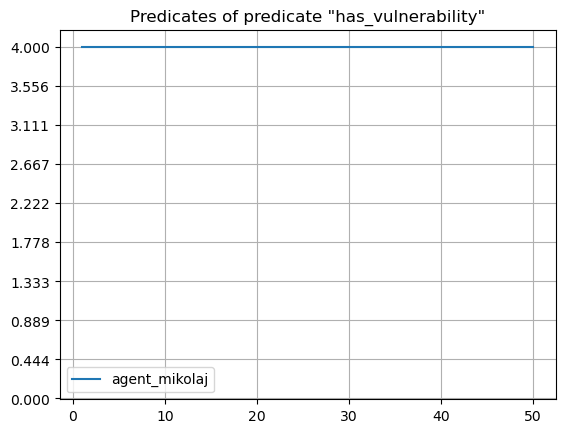

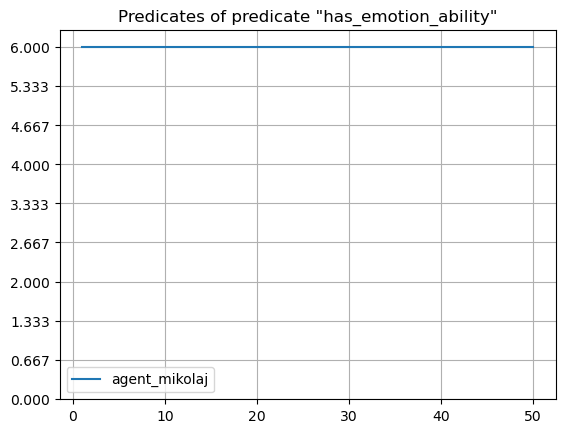

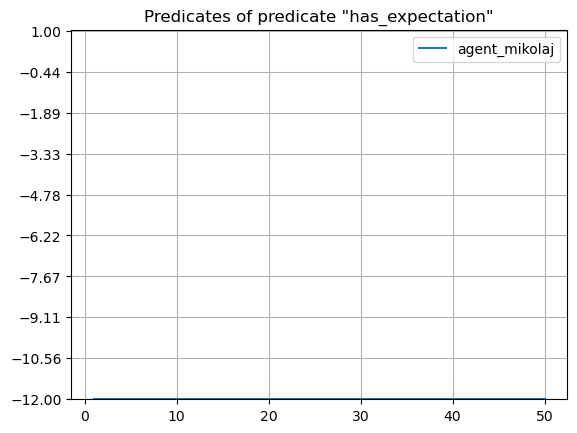

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 800x800 with 0 Axes>

In [8]:
state_machine.rules = rules

# print(state_machine.states)

state_machine.run(debug_mode=True)

from l2 import run_visualization
run_visualization(state_machine, [])

#### Visualize

The following predicates will be visualized:
has_vulnerability
has_emotion_ability
has_expectation
has_training
has_social_activities
has_loneliness
has_bad_work_performance
has_alcoholism
has_disease


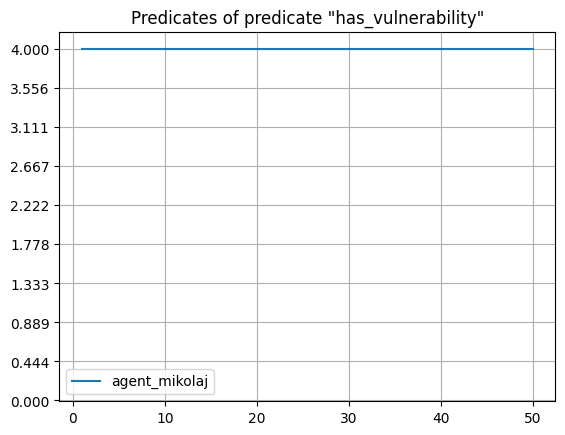

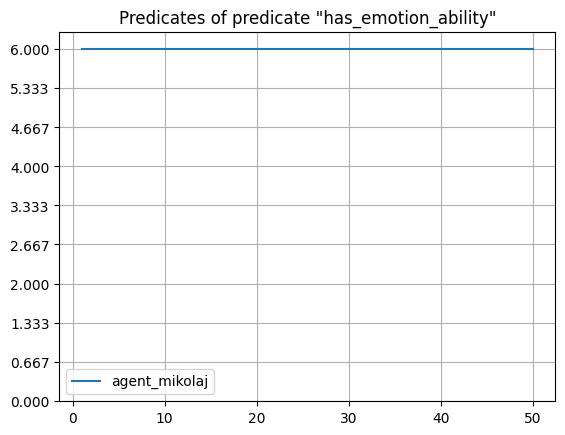

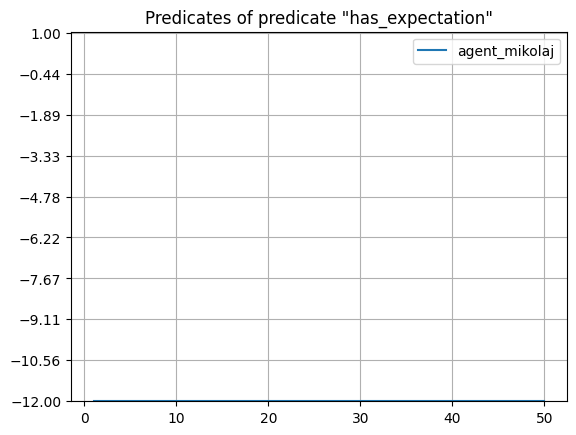

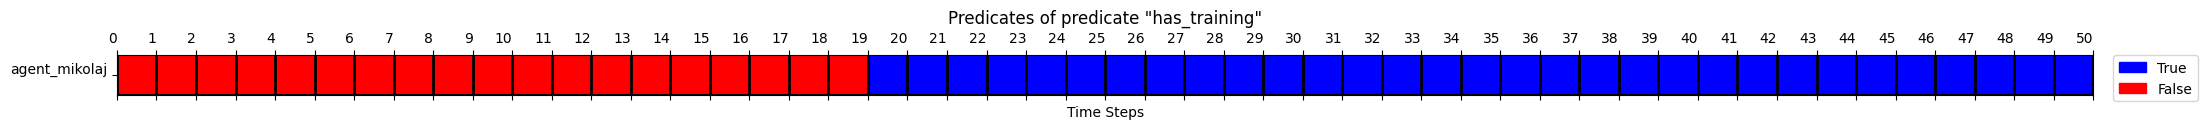

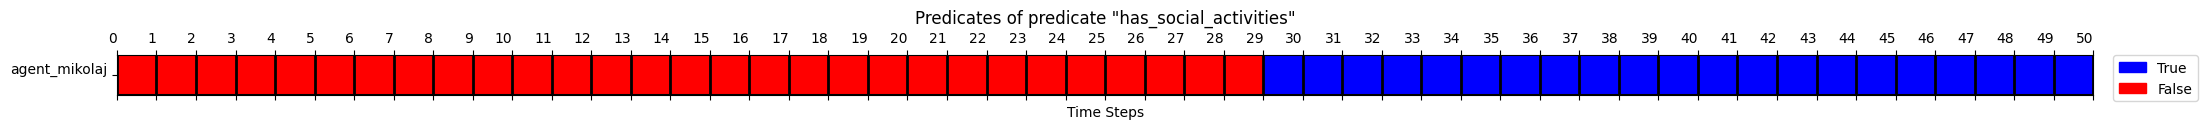

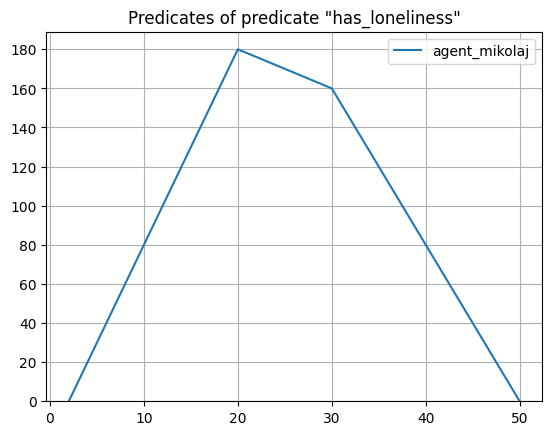

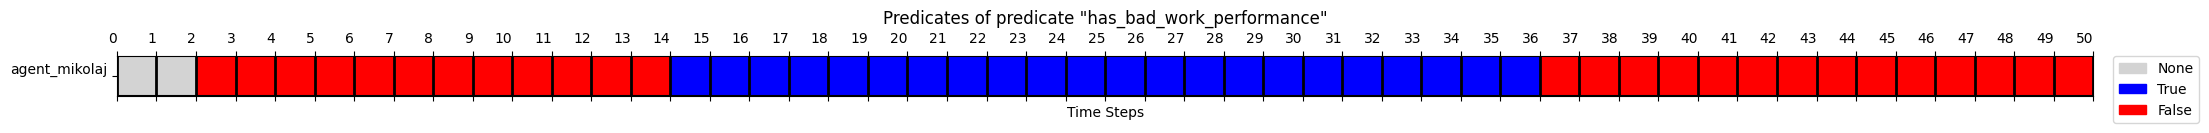

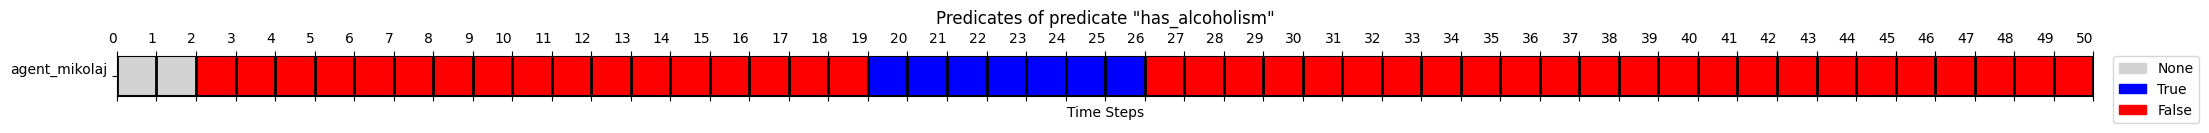

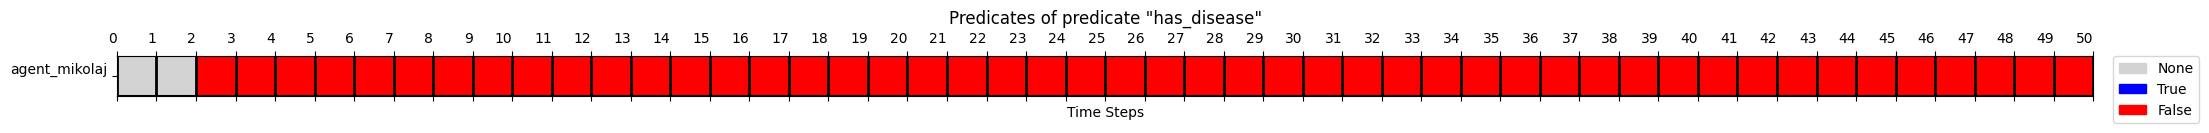

In [99]:
from l2 import run_visualization
run_visualization(state_machine, [])